# What is a PDF?
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/dmhuehol/ev228-analysis-environmental-data/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/dmhuehol/ev228-analysis-environmental-data/blob/main/code/what_is_pdf.ipynb)  
*Adapted from code by [Prof. Elizabeth Barnes](https://sites.google.com/view/barnesgroup-csu/prof-barnes) at Boston University. Both this code and the original are made available under an MIT License, included as the LICENSE file in this repository.*

This example shows the making of a probability density function (pdf). A pdf 
describes the relative likelihood of obtaining a value for a sample of a random
variable.

In [22]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#.............................................
# PLOTTING COMMANDS
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 10.0/2)

## 1. Define and explore variables

We begin by defining two normal random variables: x has length 75 and y has length 1000. These variables follow a normal (or "Gaussian") distribution, which is just one example of a probability distribution. Normal distributions appear frequently in many statistics applications.

In [ ]:
x = np.random.normal(0, 1, size=(75,))
y = np.random.normal(0, 1, size=(1000,))

<class 'numpy.ndarray'>


**QUESTION: Verify that the lengths of `x` and `y` are what you expect**

Next, we plot the values.

<class 'matplotlib.figure.Figure'>


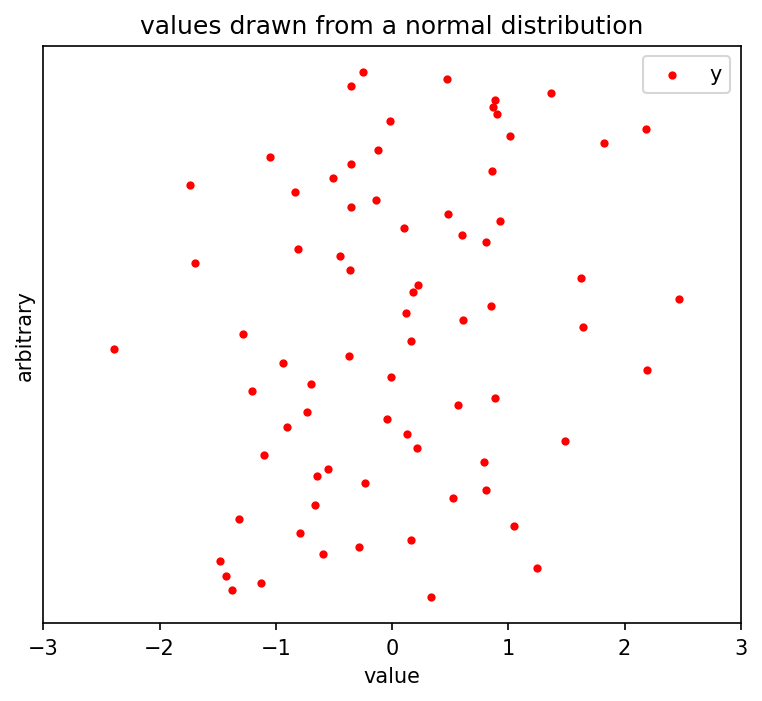

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('value')
plt.ylabel('arbitrary')
plt.yticks([])
plt.title('values drawn from a normal distribution')
plt.xlim(-3,3)

ax.scatter(x, np.arange(0, np.size(x)), s=35, color='red', marker='.', label='y')
ax.legend()
plt.show()

Now let's add the 1000 data points from y to this mess!

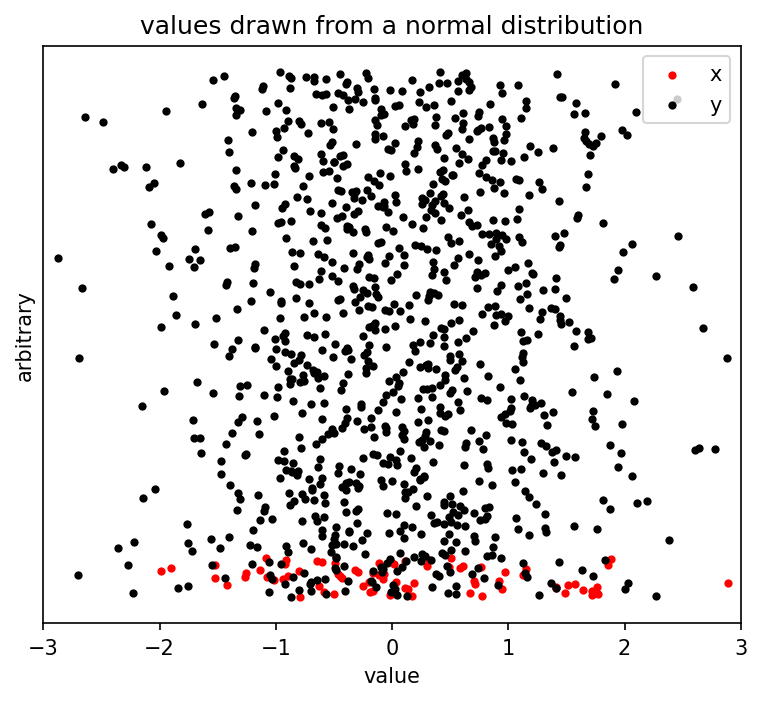

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('value')
plt.ylabel('arbitrary')
plt.yticks([])
plt.title('values drawn from a normal distribution')
plt.xlim(-3, 3)

ax.scatter(x, np.arange(0, np.size(x)), s=35, color='red', marker='.', label='x')
ax.scatter(y, np.arange(0, np.size(y)), s=35, color='black', marker='.', label='y')
ax.legend()
plt.show()

**QUESTION: What does the "arbitrary" y-axis represent? Where do these values come from? Why are they larger for y than x? (Hint: What does the `np.arange` function do?)**

### 2. Making a histogram
While plotting the data in its raw form is incredibly important and useful, sometimes it is difficult to visualize. For example, how many black dots are hiding underneath other black dots? 

To deal with this, we can display our data in a histogram. A histogram *discretizes* the data into bins representing the count of samples within a given range of values (the binwidth).

In [ ]:
binwidth = 0.5

<class 'tuple'>


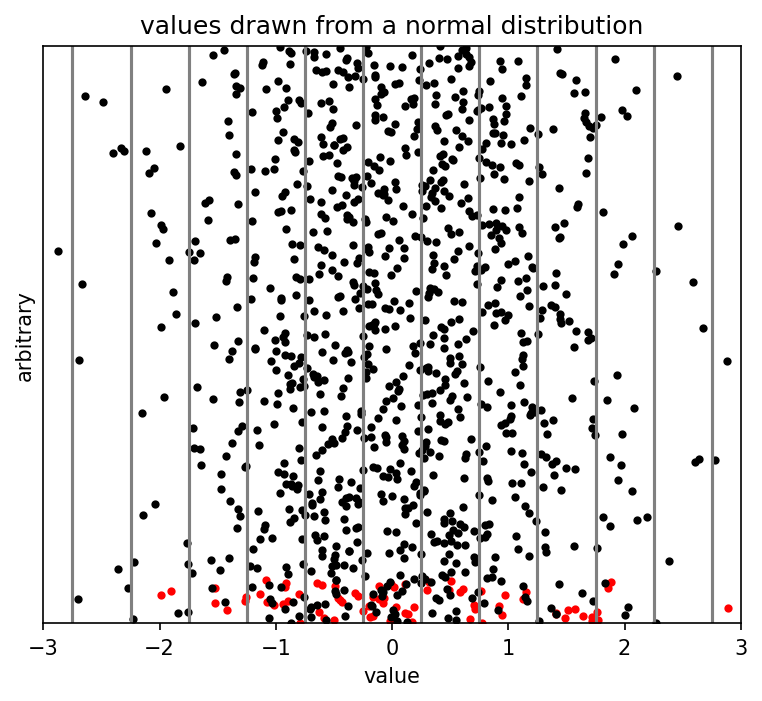

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('value')
plt.ylabel('arbitrary')
plt.yticks([])
plt.title('values drawn from a normal distribution')
plt.xlim(-3, 3)
plt.ylim(0, np.size(y))

ax.scatter(x, np.arange(0, np.size(x)), s=35, color='red', marker='.', label='x')
ax.scatter(y, np.arange(0, np.size(y)), s=35, color='black', marker='.', label='y')

x_bins = np.arange(-4, 4.5, binwidth)
for ind, val in enumerate(x_bins[1: ]):
    ax.plot([val - 0.25, val - 0.25], [0, np.size(y)],'-', color='gray')
plt.show()

Now, we count how many values fall within each bin and plot this count on the y-axis.

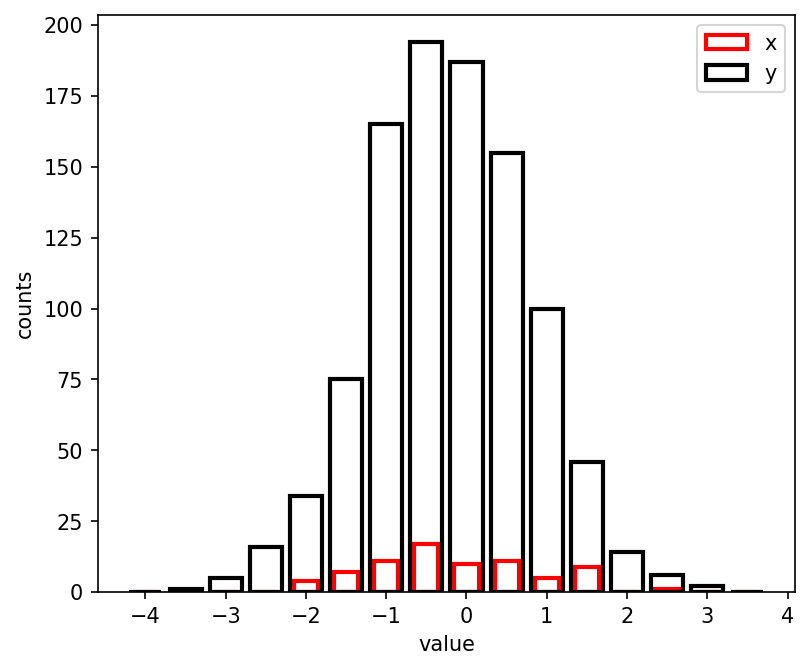

In [28]:
plt.figure()

hx = np.histogram(x, x_bins)
hy = np.histogram(y, x_bins)

plt.xlabel('value')
plt.ylabel('counts')

plt.bar(hx[1][:-1], hx[0], edgecolor='r', color=[], width=.3, label='x', linewidth=2)
plt.bar(hy[1][:-1], hy[0], edgecolor='k', color=[], width=.4, label='y', linewidth=2)
plt.legend()
plt.show()

The histogram now shows the shape of the distribution. The normal (Gaussian) distribution constructed by default is commonly called a "bell curve" because it is shaped like a bell 🔔.

**ACTIVITY: Change the colors of the x and y bars in the above figure to 
another color of your choice.**

### 3. Normalizing the counts
Our histogram looks great, and we can see that y takes on the normal "bell" shape. But, what about x? It is really hard to see because the counts are so small. This isn't necessarily a bad thing: depending on your research question, you may be intending to show that the counts for one dataset are much smaller than another dataset! However, if the goal is to compare the distributions, then this scaling is not very useful.

Instead, we can turn the counts into frequencies. To do this, we divide the counts in each bin by the total number of samples for each variable.

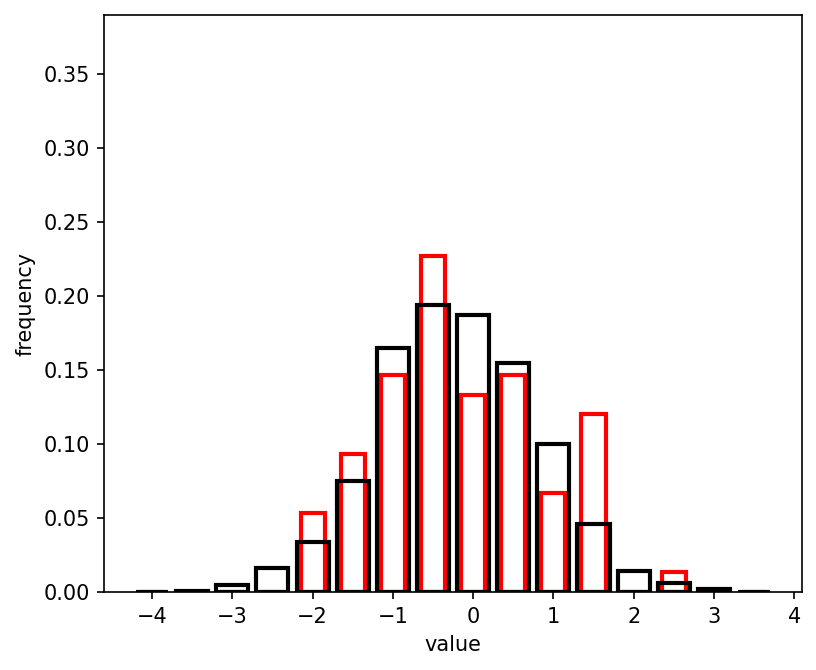

In [29]:
plt.figure()
plt.xlabel('value')
plt.ylabel('frequency')
plt.ylim(0, .39)

plt.bar(hx[1][:-1], hx[0].astype(float) / np.size(x), edgecolor='red', color=[], width=.3, linewidth=2)
plt.bar(hy[1][:-1], hy[0].astype(float) / np.size(y), edgecolor='black', color=[], width=.4, linewidth=2)
plt.show()

Now that the x and y data are on the same footing (normalized to frequency) we can more easily compare the distributions and see that in fact they are both quite similar to one another. The x data is less normal-like due to its lower sample size.

One important thing to remember about histograms and frequency plots like the one above is that they are a _dependent on the bin size_ that you choose. For example, what if we quarter our bin size?  
**QUESTION: Where in the code below do we change the bin size? How?**

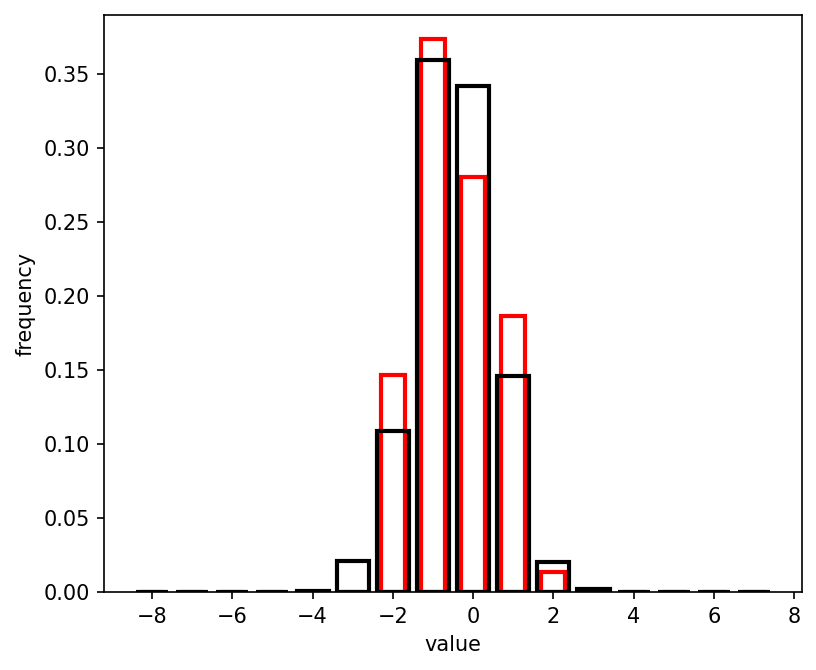

In [30]:
multiplicative_factor = 2.
hx = np.histogram(x, x_bins * multiplicative_factor)
hy = np.histogram(y, x_bins * multiplicative_factor)

plt.figure()
plt.xlabel('value')
plt.ylabel('frequency')
plt.ylim(0, .39)

fvalsx = hx[0].astype(float) / np.size(x)
fvalsy = hy[0].astype(float) / np.size(y)
plt.bar(hx[1][:-1], fvalsx, edgecolor='red', color=[], width=.3 * multiplicative_factor, linewidth=2)
plt.bar(hy[1][:-1], fvalsy, edgecolor ='black', color=[], width=.4 * multiplicative_factor, linewidth=2)
plt.show()

Both the shape of the histogram change and the y-axis change. That is, the plotted frequency is *completely dependent on how big your bins are!* However, in many instances, you do not want your plots to be a function of exactly how much data you have. We can plot the probability density function explicitly to get around this!

### 4. Making this a true probability density function (pdf)
A true pdf is *continuous*, while histograms are *discrete*. To deal with this, we can plot the pdf as a line curve.

As before, we make two random variables--this time of length 10,000 each.

In [31]:
x = np.random.normal(0, 1, size=(10000,))
y = np.random.normal(0, 1, size=(10000,))

**QUESTION: In the cell below, what do `hx` and `hy` represent? It may be 
useful to use the `print` function to view their contents.**

(array([   2,   10,   31,  144,  405,  940, 1502, 1893, 1949, 1517,  939,
        426,  170,   59,   11,    1]), array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
        1.5,  2. ,  2.5,  3. ,  3.5,  4. ]))


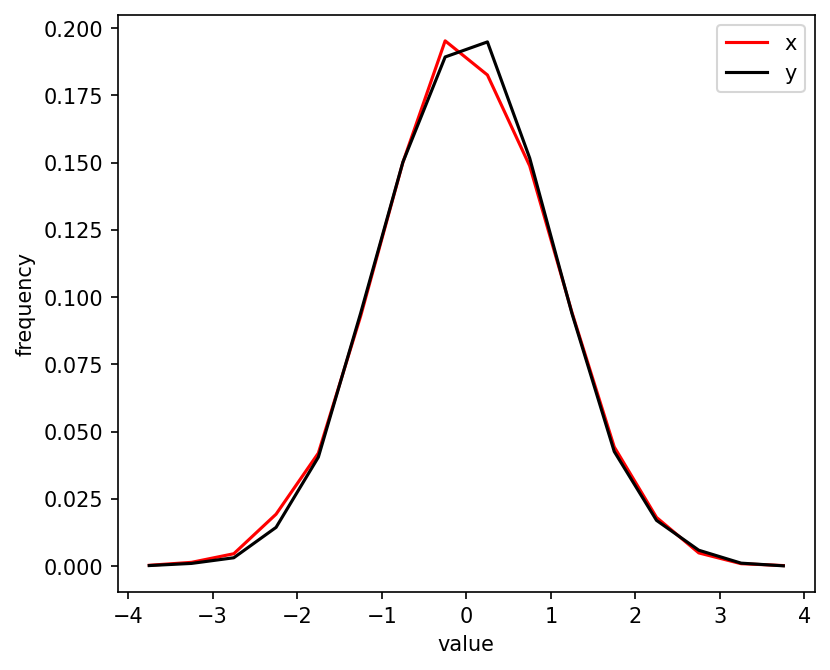

In [ ]:
hx = np.histogram(x, x_bins)
hy = np.histogram(y, x_bins)

plt.figure()

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / np.size(x)
fvalsy = hy[0].astype(float) / np.size(y)

plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x')
plt.plot(x_vals + binwidth / 2, fvalsy, color='black', label='y')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.show()

The area under the curve represents the total probability. By definition, the total probability for a pdf must sum to 1.0.  
**QUESTION: Why must this be the case?**

To state this using formal terms from calculus: the integral under the curve of the pdf (which includes the width of the x-axis bins) must sum to 1.0. (Note that this does not mean the values of the function itself need to sum to 1.0.)

Let's check whether this is the case for our data.

In [33]:
print([np.sum(fvalsx * binwidth), np.sum(fvalsy * binwidth)])

[np.float64(0.5), np.float64(0.49995)]


As you can see, the integral does not sum to 1.0, but rather, to 0.5 for both variables. Thus, our plot needs to be scaled by our bin width (making it independent of our bin width) in order to represent the true pdf.

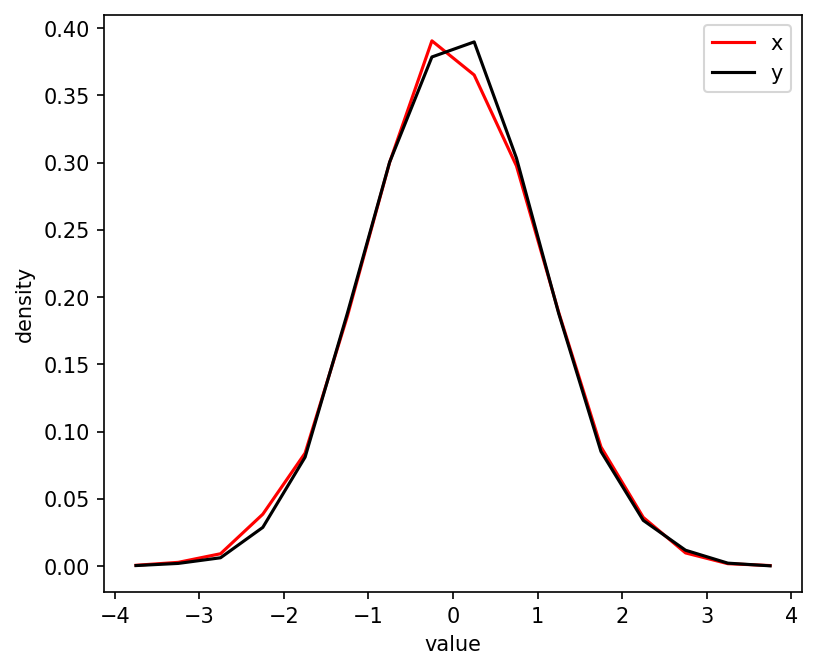

In [34]:
plt.figure()

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
fvalsy = hy[0].astype(float) / (np.size(y) * binwidth)

plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x', linewidth=1.5)
plt.plot(x_vals + binwidth / 2, fvalsy, color='black', label='y', linewidth=1.5)
plt.xlabel('value')
plt.ylabel('density')
plt.legend()

plt.show()

In [35]:
print([np.sum(fvalsx) * binwidth, np.sum(fvalsy) * binwidth])

[np.float64(1.0), np.float64(0.9999)]


In practice, people usually plot smoothed versions of pdfs in order to make prettier figures. There are lots of ways to smooth things; pdf estimation usually involves applying a "kernel estimator." This involves determining the values as weighted averages of the samples around each point. The weight is defined by the kernel such that closer points are weighted more heavily. In the example below, we apply a normal-shaped kernel.

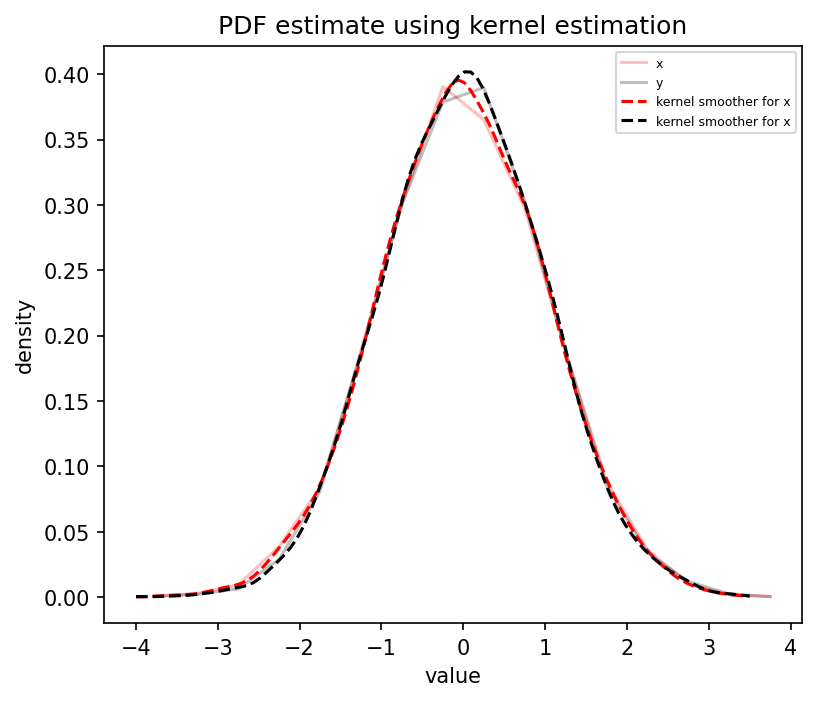

In [36]:
plt.figure()

x_vals = hx[1][:-1]
fvalsx = hx[0].astype(float) / (np.size(x) * binwidth)
fvalsy = hy[0].astype(float) / (np.size(y) * binwidth)

plt.plot(x_vals + binwidth / 2, fvalsx, color='red', label='x',linewidth=1.5, alpha=.25)
plt.plot(x_vals + binwidth / 2, fvalsy, color='black', label='y',linewidth=1.5, alpha=.25)

xvals_smoothed = np.linspace(np.min(x_vals), np.max(x_vals), 100)
kernel_x = stats.gaussian_kde(x)
plt.plot(xvals_smoothed, kernel_x.pdf(xvals_smoothed), linestyle='--', color='red', label='kernel smoother for x')
kernel_y = stats.gaussian_kde(y)
plt.plot(xvals_smoothed, kernel_y.pdf(xvals_smoothed), linestyle='--', color='black', label='kernel smoother for x')

plt.xlabel('value')
plt.ylabel('density')
plt.legend(fontsize=6)
plt.title('PDF estimate using kernel estimation')

plt.show()

### 5. The cumulative density function (CDF)
The cumulative density function (CDF) shows the probability that the data will take a value less than or equal to x.

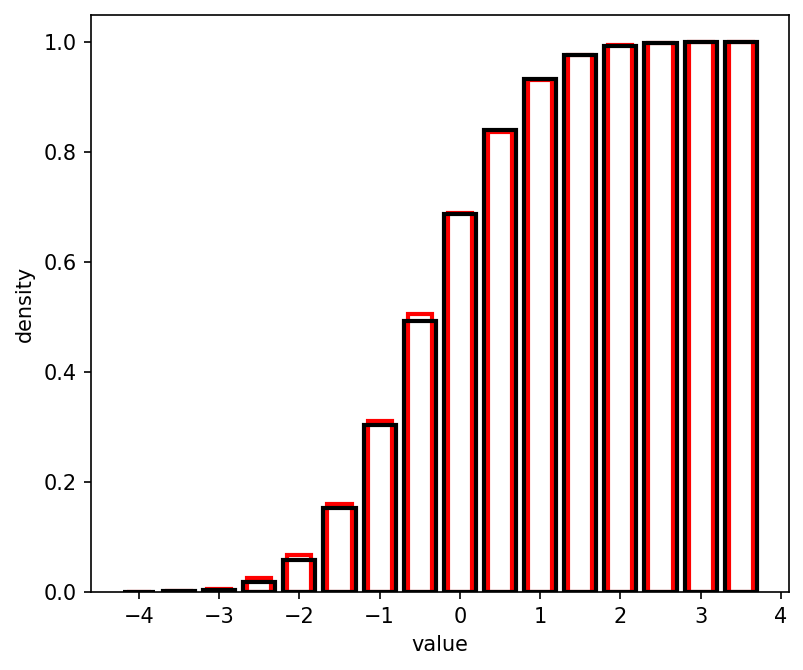

In [37]:
plt.figure()

hxx = np.cumsum(hx[0])
hyy = np.cumsum(hy[0])

plt.xlabel('value')
plt.ylabel('density')

plt.bar(hx[1][:-1], hxx.astype(float) / np.size(x), edgecolor='red', color=[], width=.3, linewidth=2)
plt.bar(hy[1][:-1], hyy.astype(float) / np.size(y), edgecolor='k', color=[], width=.4, linewidth=2)
plt.show()

**ACTIVITY: Go back to the cell where we define the distribution for our random 
variable. Change the distribution in some way and repeat the notebook. You may
either change the inputs to the `np.random.normal` function or choose another
probability distribution available in `numpy` from the list at the following 
link: https://numpy.org/doc/stable/reference/random/legacy.html#distributions**